##Importing the modules

In [ ]:
!pip install transformers

In [5]:
# Use a pipeline as a high-level helper
from transformers import pipeline
import pandas as pd
import re

pipe = pipeline("text-classification", model="borisn70/bert-43-multilabel-emotion-detection")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [6]:
res = pipe("I really love and admire this youtuber becuase of the way he insires hope into people")
res

[{'label': 'love', 'score': 0.9459607601165771}]

In [7]:
pipe.model.config.id2label

{0: 'admiration',
 1: 'amusement',
 2: 'anger',
 3: 'annoyance',
 4: 'approval',
 5: 'caring',
 6: 'confusion',
 7: 'curiosity',
 8: 'desire',
 9: 'disappointment',
 10: 'disapproval',
 11: 'disgust',
 12: 'embarrassment',
 13: 'excitement',
 14: 'fear',
 15: 'gratitude',
 16: 'grief',
 17: 'joy',
 18: 'love',
 19: 'nervousness',
 20: 'optimism',
 21: 'pride',
 22: 'realization',
 23: 'relief',
 24: 'remorse',
 25: 'sadness',
 26: 'surprise',
 27: 'neutral',
 28: 'worry',
 29: 'happiness',
 30: 'fun',
 31: 'hate',
 32: 'autonomy',
 33: 'safety',
 34: 'understanding',
 35: 'empty',
 36: 'enthusiasm',
 37: 'recreation',
 38: 'sense_of_belonging',
 39: 'meaning',
 40: 'sustenance',
 41: 'creativity',
 42: 'boredom'}

## Sentiment Analysis

In [4]:
# Function to clean comments
def clean_comment(comment):
  """Cleans a comment by removing special characters, extra whitespace, and URLs."""

  # Remove URLs
  comment = re.sub(r'http\S+', '', comment)
  # Remove special characters and extra whitespace
  comment = re.sub(r'[^\w\s]', '', comment)
  comment = re.sub(r'\s+', ' ', comment).strip()
  return comment


# Load the CSV file (replace 'your_file.csv' with the actual file name)
# Replace with your actual file path, if necessary.
try:
    df = pd.read_csv('pewdiepie_1year_ago_comments.csv')
except FileNotFoundError:
    print("Error: 'your_file.csv' not found. Please upload the file or provide the correct path.")
    df = pd.DataFrame() # Create an empty DataFrame to avoid further errors

if not df.empty:
    # Clean the comment column
    df['comment'] = df['comment'].astype(str)

    df['cleaned_comment'] = df['comment'].apply(clean_comment)

    # Perform sentiment analysis on the cleaned comments
    sentiments = []
    for comment in df['cleaned_comment']:
        if isinstance(comment, str) and len(comment) > 0: # Check if comment is a string and not empty
          result = pipe(comment, max_length=512) # Pass max_length to the pipeline
          sentiments.append(result)
        else:
          sentiments.append([{'label': 'Neutral', 'score': 1.0}]) # Handle empty or non-string values


    df['sentiment'] = sentiments

    # Print the DataFrame with the sentiment analysis results (optional)
    print(df)

    # Save the updated dataframe to a new CSV file.
    df.to_csv("pewdiepie_1year_ago_comments_results.csv", index=False)
    print("Results saved to sentiment_analysis_results.csv")

Error: 'your_file.csv' not found. Please upload the file or provide the correct path.


Combining all the dataframes

In [5]:

import pandas as pd

def combine_dataframes(file_paths):
    """Combines multiple CSV files into a single DataFrame.

    Args:
        file_paths: A list of file paths to CSV files.

    Returns:
        A pandas DataFrame containing the combined data, or None if an error occurs.
    """
    try:
        combined_df = pd.DataFrame()
        for file_path in file_paths:
            try:
                df = pd.read_csv(file_path)
                combined_df = pd.concat([combined_df, df], ignore_index=True)
            except FileNotFoundError:
                print(f"Warning: File not found: {file_path}")
                # You can choose to raise the exception here if you want to stop execution if a file is missing.
                # raise

        return combined_df
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage:
file_paths = ["pewdiepie_1year_ago_comments_results.csv", "pewdiepie1.csv", "pewdiepie_6mon_ago_comments_results.csv"]  # Replace with your actual file paths.
combined_dataframe = combine_dataframes(file_paths)

if combined_dataframe is not None:
    # Save the combined DataFrame to a new CSV file
    combined_dataframe.to_csv("combined_data_pewdiepie.csv", index=False)
    print("Combined data saved to combined_data.csv")
    print(combined_dataframe.head()) # Display the first few rows of the combined DataFrame

Combined data saved to combined_data.csv
Empty DataFrame
Columns: []
Index: []


  ## PSR Analysis for IShowSpeed

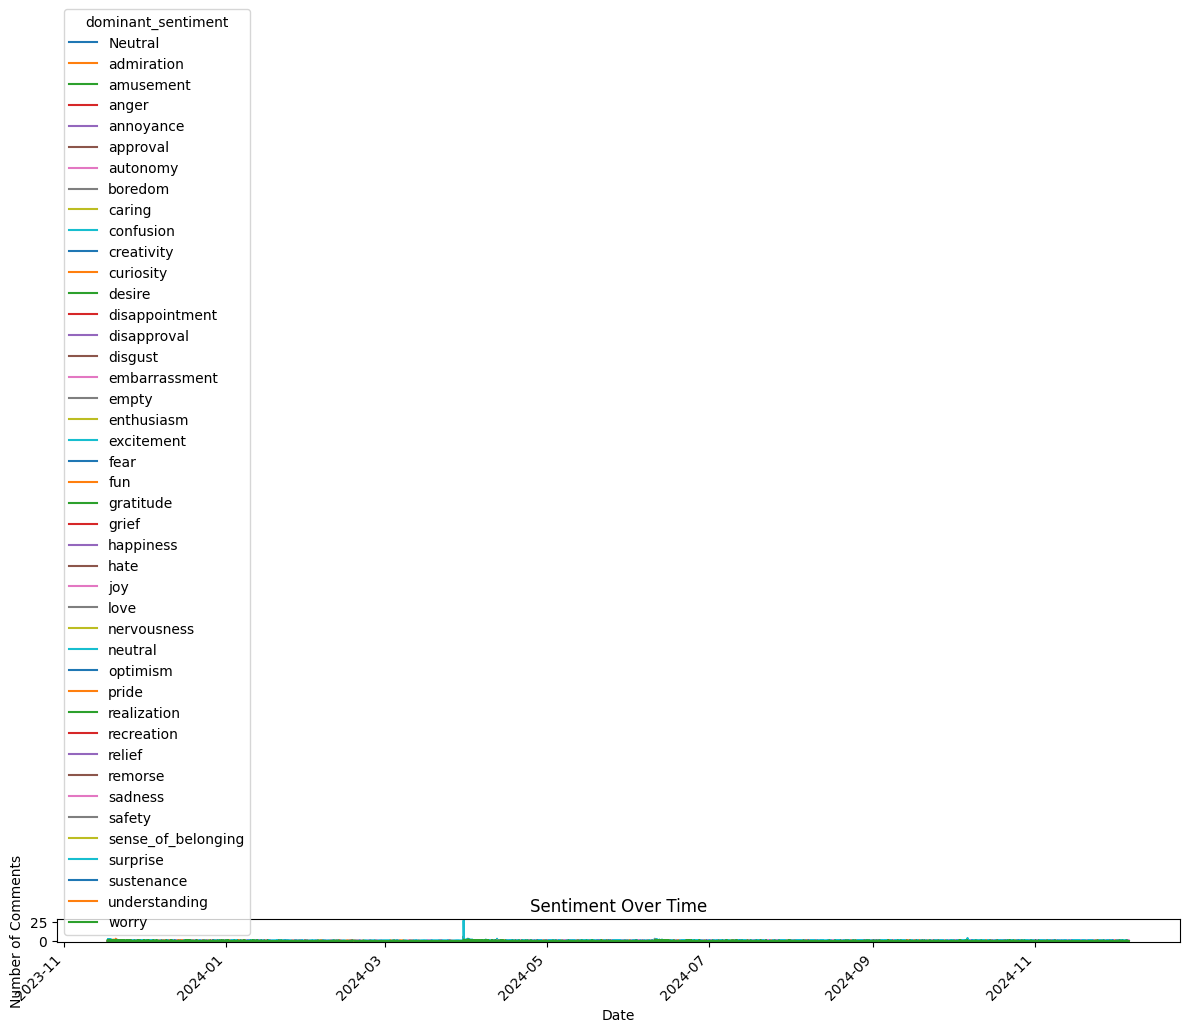

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the combined dataframe
try:
    df = pd.read_csv('Combined Data iShowSpeed.csv')
except FileNotFoundError:
    print("Error: 'combined_data.csv' not found. Please make sure to run the previous code blocks to generate this file.")
    exit()


# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Assuming 'sentiment' column contains a list of dictionaries like: [{'label': 'joy', 'score': 0.9}, ...]
# Extract the dominant sentiment label for each comment.
def get_dominant_sentiment(sentiment_list):
    if isinstance(sentiment_list, str):  # Handle potential string representations of lists
        try:
            sentiment_list = eval(sentiment_list)  # Safely evaluate string as a list
        except (SyntaxError, NameError):
            return "Neutral"  # or handle the error as needed

    if isinstance(sentiment_list, list) and len(sentiment_list) > 0:
        dominant_sentiment = max(sentiment_list, key=lambda x: x['score'])
        return dominant_sentiment['label']
    return "Neutral"  # Return "Neutral" if the list is empty or not a list


df['dominant_sentiment'] = df['sentiment'].apply(get_dominant_sentiment)


# Group by date and sentiment, then count occurrences
sentiment_over_time = df.groupby(['date', 'dominant_sentiment']).size().unstack(fill_value=0)

# Plotting
sentiment_over_time.plot(kind='line', figsize=(20, 6))
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Error: 'combined_data.csv' not found. Please make sure to run the previous code blocks to generate this file.


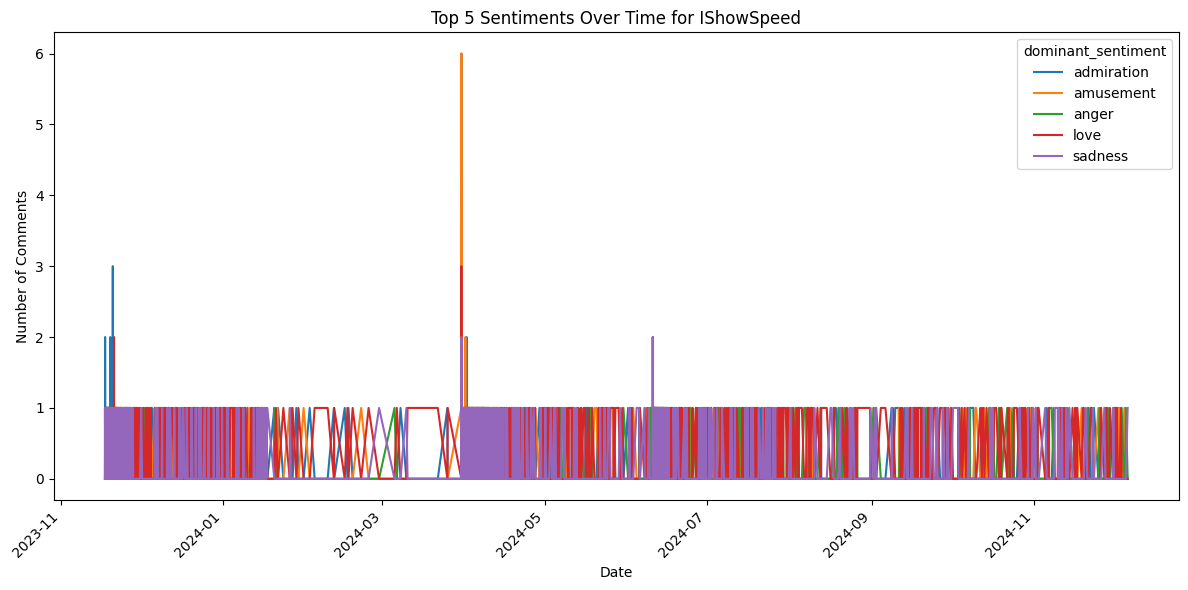

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined dataframe
try:
    df = pd.read_csv('combined_data_ishowspeed.csv')
except FileNotFoundError:
    print("Error: 'combined_data.csv' not found. Please make sure to run the previous code blocks to generate this file.")
    exit()

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Function to get dominant sentiment
def get_dominant_sentiment(sentiment_list):
    if isinstance(sentiment_list, str):
        try:
            sentiment_list = eval(sentiment_list)
        except (SyntaxError, NameError):
            return "Neutral"
    if isinstance(sentiment_list, list) and len(sentiment_list) > 0:
        dominant_sentiment = max(sentiment_list, key=lambda x: x['score'])
        return dominant_sentiment['label']
    return "Neutral"

df['dominant_sentiment'] = df['sentiment'].apply(get_dominant_sentiment)

# Remove rows where the dominant sentiment is 'Neutral'
df = df[df['dominant_sentiment'] != 'Neutral']
df = df[df['dominant_sentiment'] != 'neutral']

# Find the top 5 sentiments
top_5_sentiments = df['dominant_sentiment'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 sentiments
df_top_5 = df[df['dominant_sentiment'].isin(top_5_sentiments)]

# Group by date and sentiment, then count occurrences
sentiment_over_time = df_top_5.groupby(['date', 'dominant_sentiment']).size().unstack(fill_value=0)

# Plotting
sentiment_over_time.plot(kind='line', figsize=(12, 6))
plt.title('Top 5 Sentiments Over Time for IShowSpeed')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

label
neutral       14991
admiration     2265
love           2021
sadness        1283
Neutral        1267
Name: count, dtype: int64


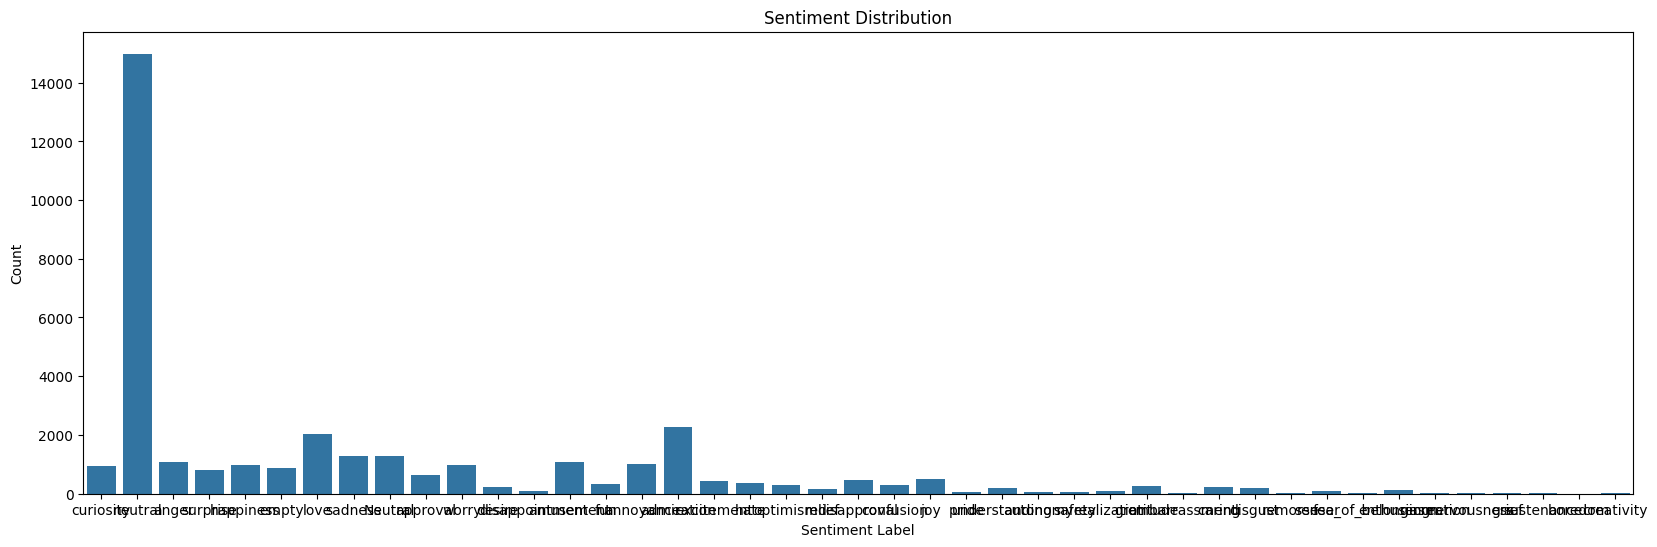

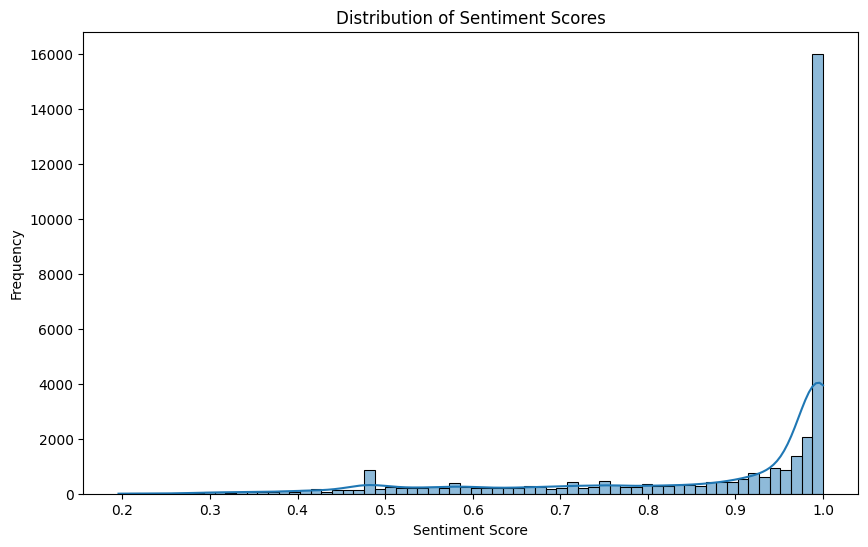

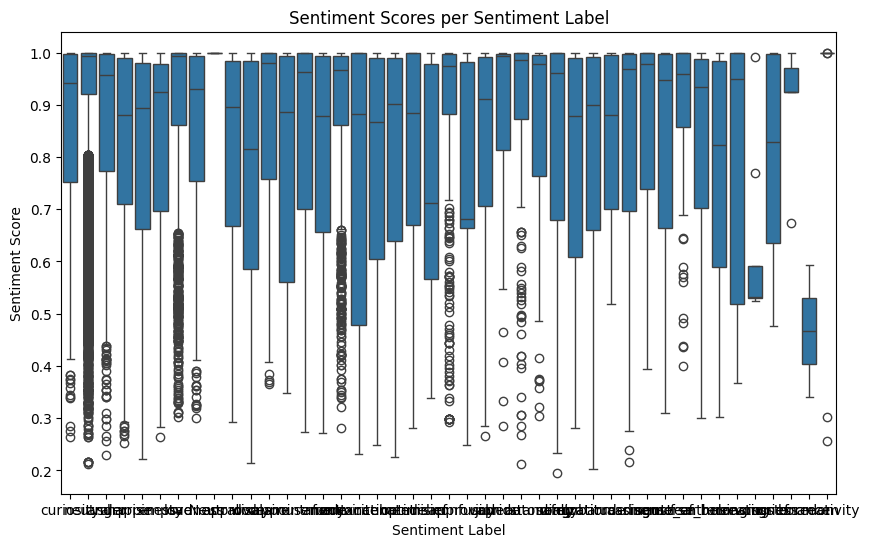

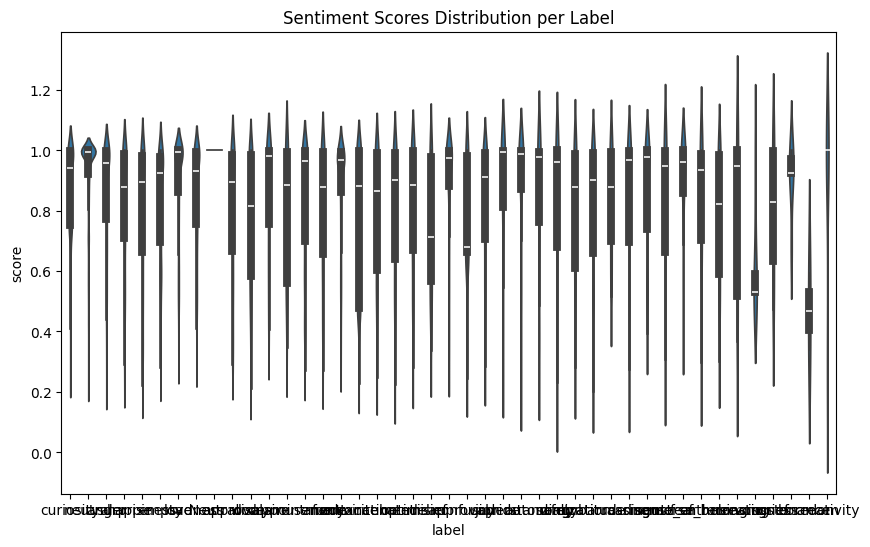

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the dataframe.
try:
    df = pd.read_csv('Combined Data iShowSpeed.csv')
except FileNotFoundError:
    print("Error: 'sentiment_analysis_results2.csv' not found. Please make sure to run the sentiment analysis code first.")
    exit()

# Convert the sentiment column to lists of dictionaries
df['sentiment'] = df['sentiment'].apply(ast.literal_eval)


# Function to extract labels and scores
def extract_sentiment_info(sentiment_list):
    labels = []
    scores = []
    for item in sentiment_list:
      labels.append(item['label'])
      scores.append(item['score'])
    return labels, scores

df['labels'], df['scores'] = zip(*df['sentiment'].apply(extract_sentiment_info))

# Create a new DataFrame for better visualization
sentiment_df = pd.DataFrame(columns=['label','score'])

for index, row in df.iterrows():
    for i, label in enumerate(row['labels']):
      sentiment_df.loc[len(sentiment_df.index)] = [label, row['scores'][i]]

# Visualizations
# Get top 5 labels and their counts
top_5_labels = sentiment_df['label'].value_counts().nlargest(5)

# Sort the top 5 labels by count in descending order
top_5_labels = top_5_labels.sort_values(ascending=False)

# Print the top 5 labels and their counts
print(top_5_labels)
# 1. Bar plot of sentiment counts
plt.figure(figsize=(20, 6))
sns.countplot(x='label', data=sentiment_df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

# 2. Distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(x='score', data=sentiment_df, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# 3. Box plot of scores per sentiment label
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='score', data=sentiment_df)
plt.title('Sentiment Scores per Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Sentiment Score')
plt.show()

# 4. Violin plot to show the distribution and density of sentiment scores for each label
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='score', data=sentiment_df)
plt.title('Sentiment Scores Distribution per Label')
plt.show()

PSR Analysis for Pewdiepie

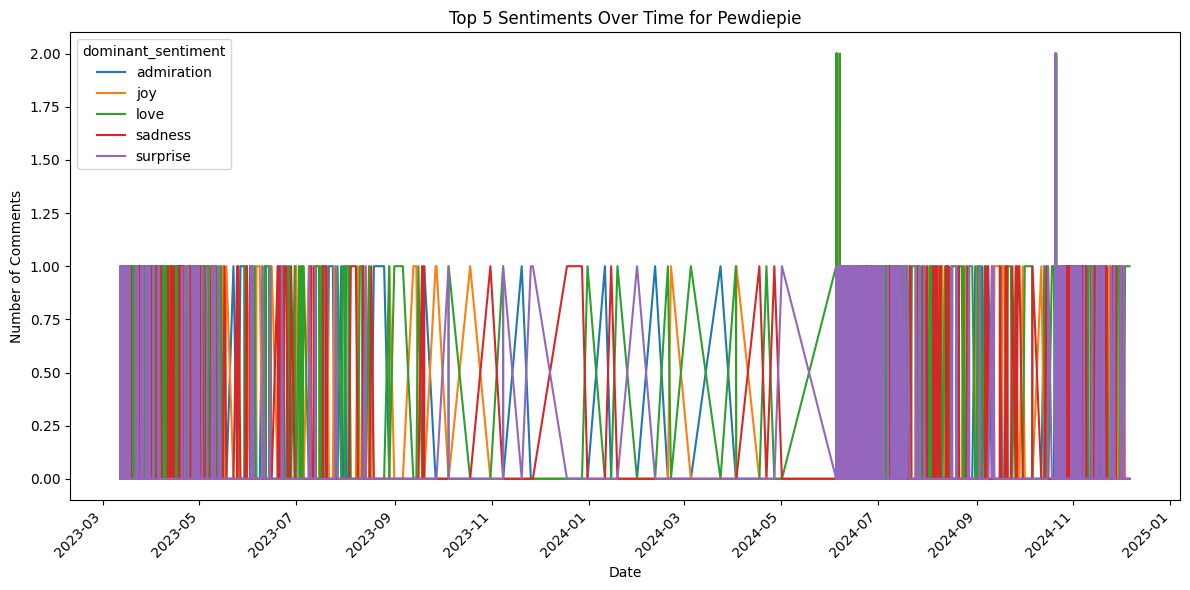

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined dataframe
try:
    df = pd.read_csv('combined_data_pewdiepie.csv')
except FileNotFoundError:
    print("Error: 'combined_data.csv' not found. Please make sure to run the previous code blocks to generate this file.")
    exit()

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Function to get dominant sentiment
def get_dominant_sentiment(sentiment_list):
    if isinstance(sentiment_list, str):
        try:
            sentiment_list = eval(sentiment_list)
        except (SyntaxError, NameError):
            return "Neutral"
    if isinstance(sentiment_list, list) and len(sentiment_list) > 0:
        dominant_sentiment = max(sentiment_list, key=lambda x: x['score'])
        return dominant_sentiment['label']
    return "Neutral"

df['dominant_sentiment'] = df['sentiment'].apply(get_dominant_sentiment)

# Remove rows where the dominant sentiment is 'Neutral'
df = df[df['dominant_sentiment'] != 'Neutral']
df = df[df['dominant_sentiment'] != 'neutral']

# Find the top 5 sentiments
top_5_sentiments = df['dominant_sentiment'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 sentiments
df_top_5 = df[df['dominant_sentiment'].isin(top_5_sentiments)]

# Group by date and sentiment, then count occurrences
sentiment_over_time = df_top_5.groupby(['date', 'dominant_sentiment']).size().unstack(fill_value=0)

# Plotting
sentiment_over_time.plot(kind='line', figsize=(12, 6))
plt.title('Top 5 Sentiments Over Time for Pewdiepie')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

label
neutral       4680
love          2245
joy           1086
admiration     993
sadness        818
Name: count, dtype: int64


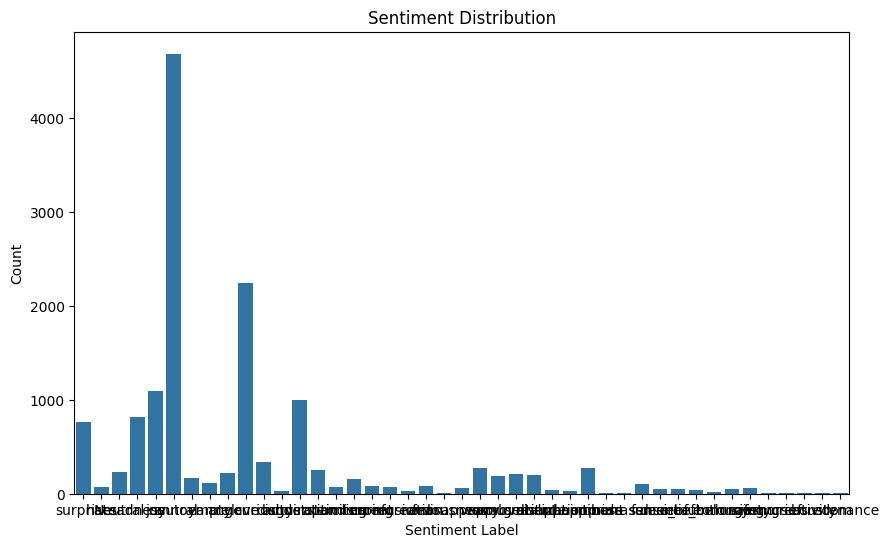

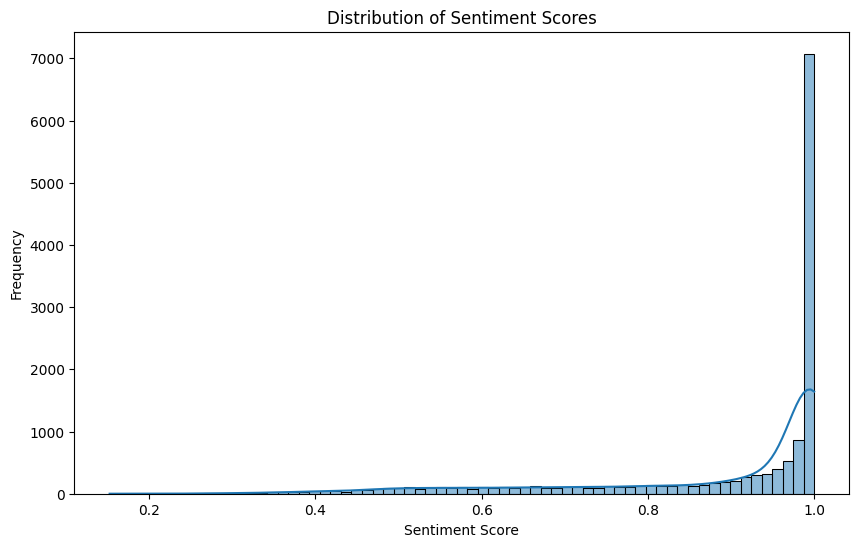

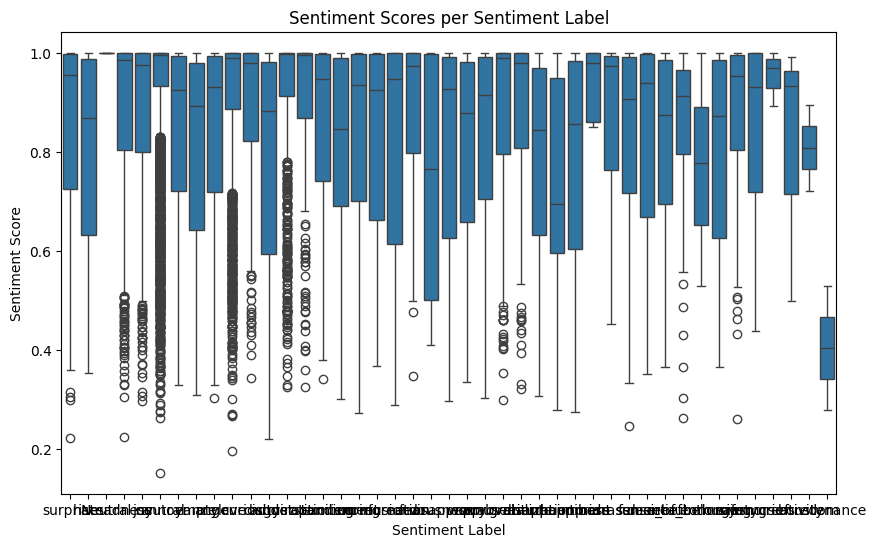

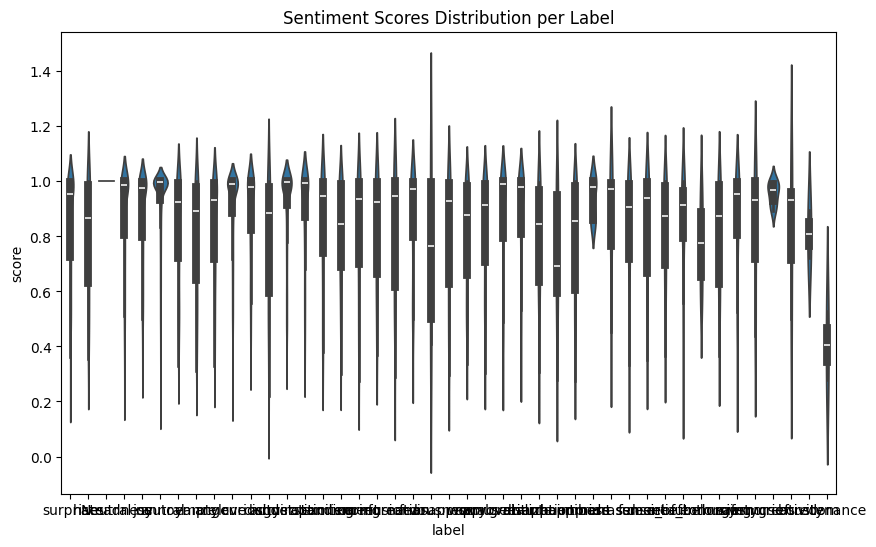

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the dataframe.
try:
    df = pd.read_csv('combined_data_pewdiepie.csv')
except FileNotFoundError:
    print("Error: 'sentiment_analysis_results2.csv' not found. Please make sure to run the sentiment analysis code first.")
    exit()

# Convert the sentiment column to lists of dictionaries
df['sentiment'] = df['sentiment'].apply(ast.literal_eval)


# Function to extract labels and scores
def extract_sentiment_info(sentiment_list):
    labels = []
    scores = []
    for item in sentiment_list:
      labels.append(item['label'])
      scores.append(item['score'])
    return labels, scores

df['labels'], df['scores'] = zip(*df['sentiment'].apply(extract_sentiment_info))

# Create a new DataFrame for better visualization
sentiment_df = pd.DataFrame(columns=['label','score'])

for index, row in df.iterrows():
    for i, label in enumerate(row['labels']):
      sentiment_df.loc[len(sentiment_df.index)] = [label, row['scores'][i]]

# Visualizations

# Get top 5 labels and their counts
top_5_labels = sentiment_df['label'].value_counts().nlargest(5)

# Sort the top 5 labels by count in descending order
top_5_labels = top_5_labels.sort_values(ascending=False)

# Print the top 5 labels and their counts
print(top_5_labels)

# 1. Bar plot of sentiment counts
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=sentiment_df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

# 2. Distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(x='score', data=sentiment_df, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# 3. Box plot of scores per sentiment label
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='score', data=sentiment_df)
plt.title('Sentiment Scores per Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Sentiment Score')
plt.show()

# 4. Violin plot to show the distribution and density of sentiment scores for each label
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='score', data=sentiment_df)
plt.title('Sentiment Scores Distribution per Label')
plt.show()

## PSR Analysis for MRbeast

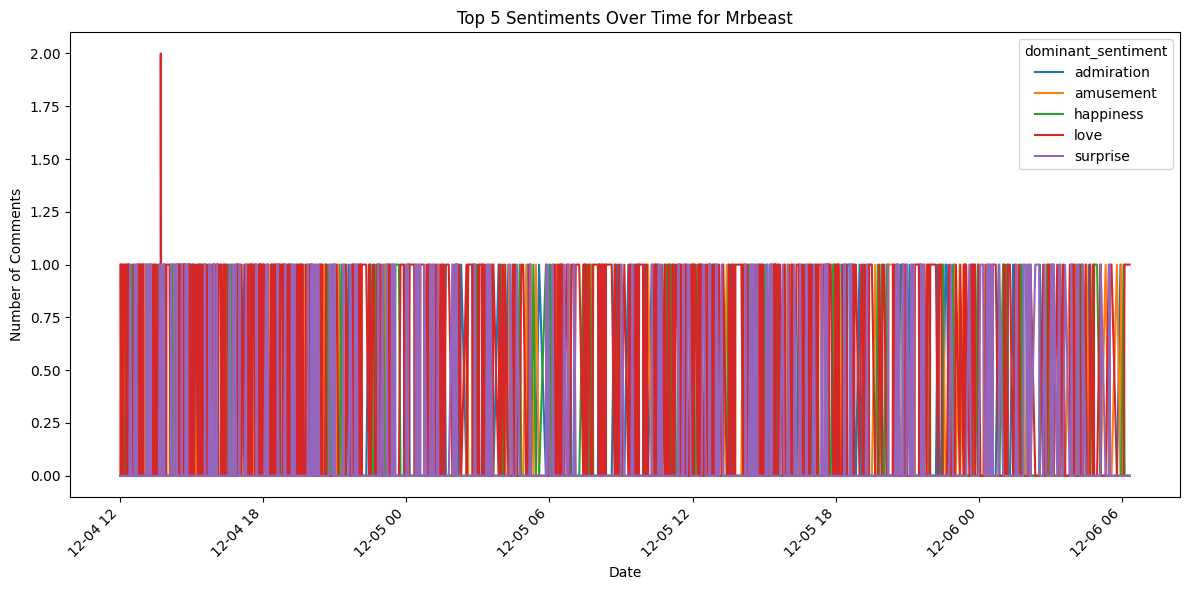

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined dataframe
try:
    df = pd.read_csv('mrbeast_30_Nov_results.csv')
except FileNotFoundError:
    print("Error: 'combined_data.csv' not found. Please make sure to run the previous code blocks to generate this file.")
    exit()

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Function to get dominant sentiment
def get_dominant_sentiment(sentiment_list):
    if isinstance(sentiment_list, str):
        try:
            sentiment_list = eval(sentiment_list)
        except (SyntaxError, NameError):
            return "Neutral"
    if isinstance(sentiment_list, list) and len(sentiment_list) > 0:
        dominant_sentiment = max(sentiment_list, key=lambda x: x['score'])
        return dominant_sentiment['label']
    return "Neutral"

df['dominant_sentiment'] = df['sentiment'].apply(get_dominant_sentiment)

# Remove rows where the dominant sentiment is 'Neutral'
df = df[df['dominant_sentiment'] != 'Neutral']
df = df[df['dominant_sentiment'] != 'neutral']

# Find the top 5 sentiments
top_5_sentiments = df['dominant_sentiment'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 sentiments
df_top_5 = df[df['dominant_sentiment'].isin(top_5_sentiments)]

# Group by date and sentiment, then count occurrences
sentiment_over_time = df_top_5.groupby(['date', 'dominant_sentiment']).size().unstack(fill_value=0)

# Plotting
sentiment_over_time.plot(kind='line', figsize=(12, 6))
plt.title('Top 5 Sentiments Over Time for Mrbeast')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

label
neutral       3513
love           599
Neutral        301
admiration     265
surprise       175
Name: count, dtype: int64


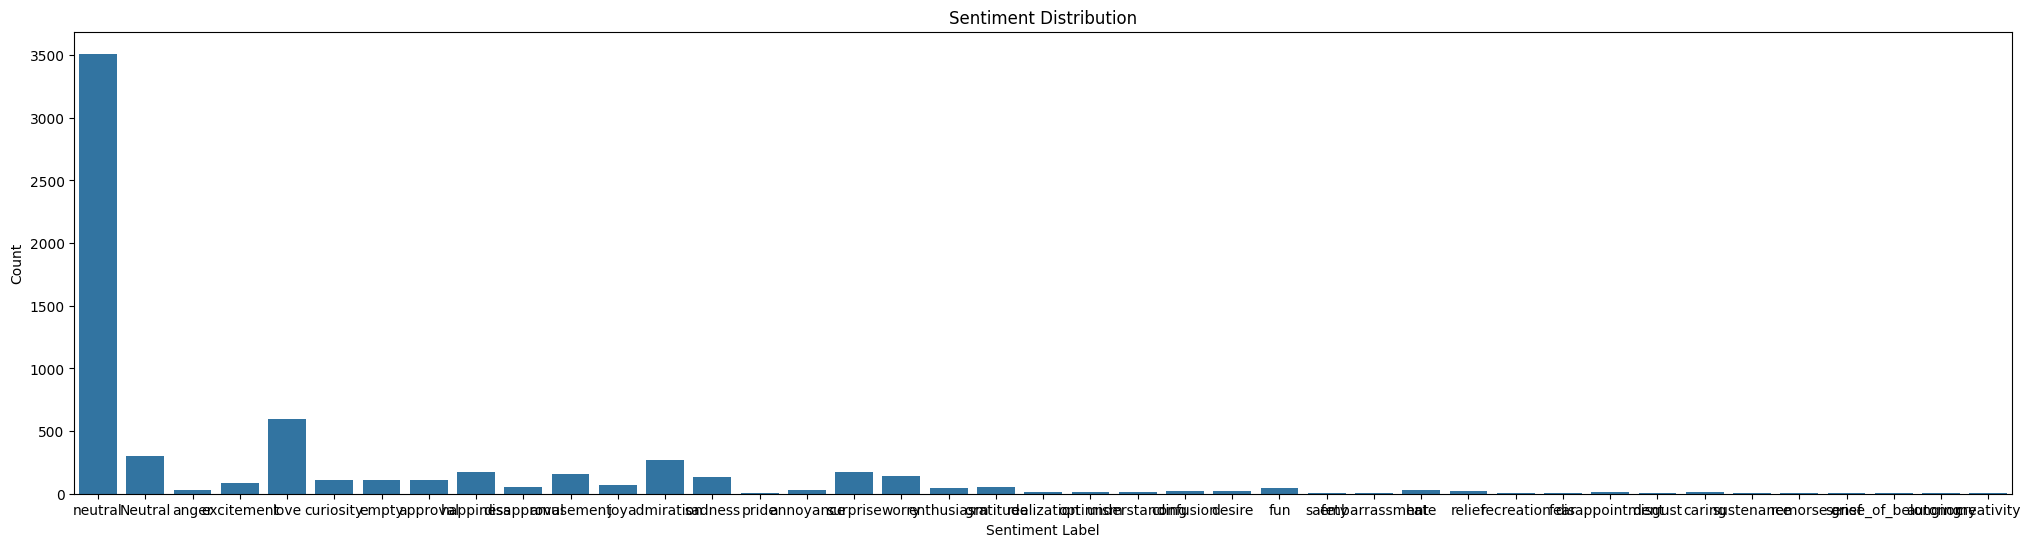

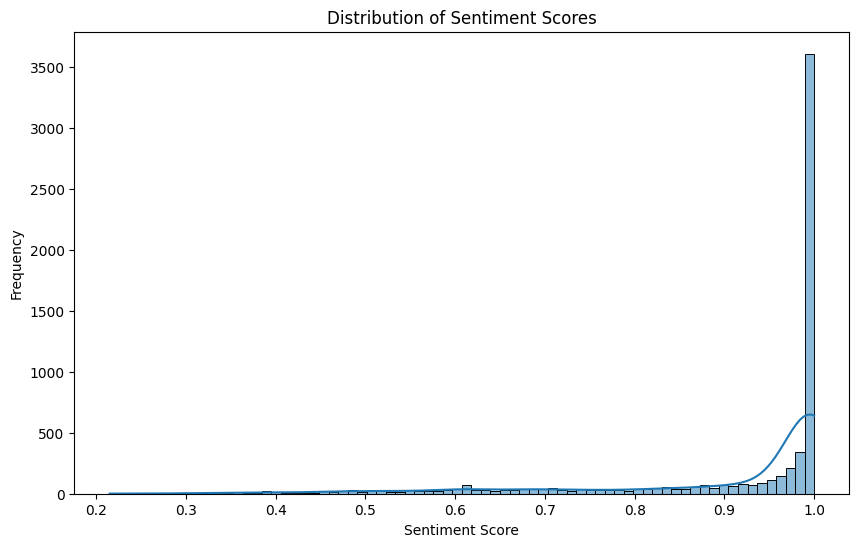

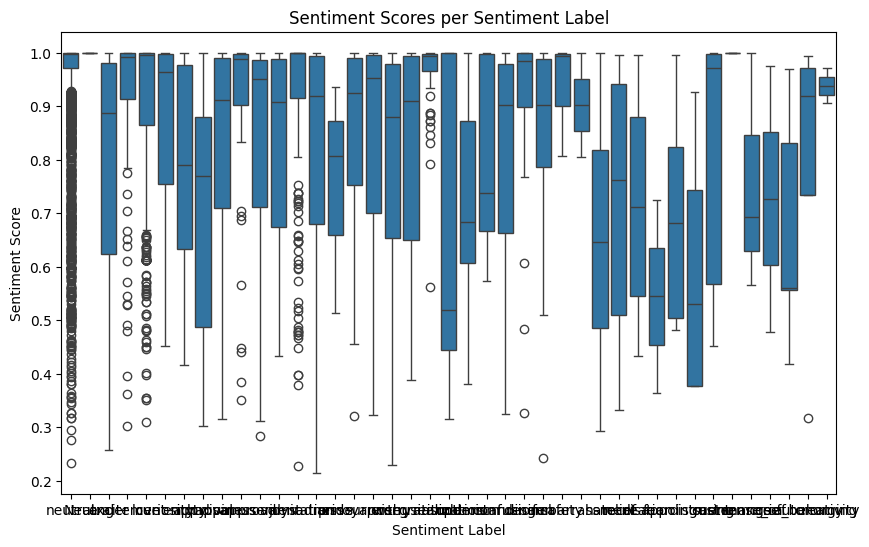

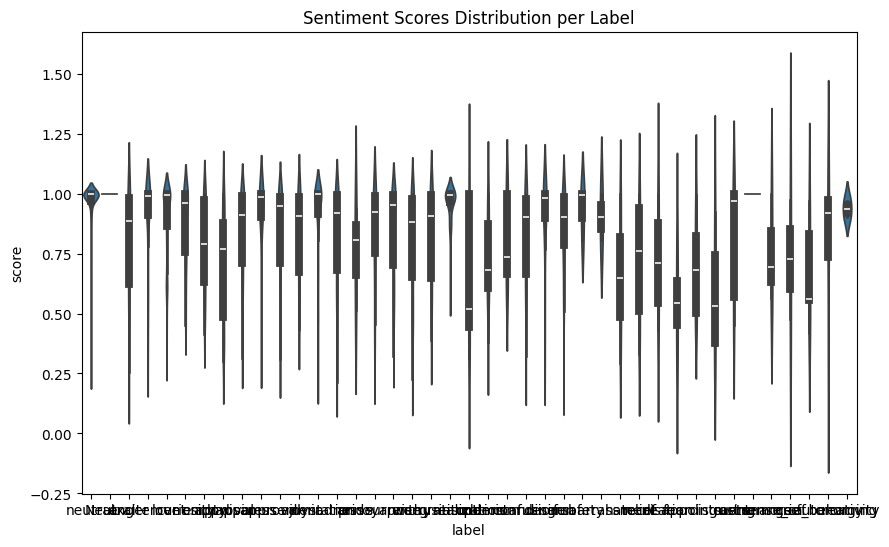

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the dataframe.
try:
    df = pd.read_csv('mrbeast_30_Nov_results.csv')
except FileNotFoundError:
    print("Error: 'sentiment_analysis_results2.csv' not found. Please make sure to run the sentiment analysis code first.")
    exit()

# Convert the sentiment column to lists of dictionaries
df['sentiment'] = df['sentiment'].apply(ast.literal_eval)


# Function to extract labels and scores
def extract_sentiment_info(sentiment_list):
    labels = []
    scores = []
    for item in sentiment_list:
      labels.append(item['label'])
      scores.append(item['score'])
    return labels, scores

df['labels'], df['scores'] = zip(*df['sentiment'].apply(extract_sentiment_info))

# Create a new DataFrame for better visualization
sentiment_df = pd.DataFrame(columns=['label','score'])

for index, row in df.iterrows():
    for i, label in enumerate(row['labels']):
      sentiment_df.loc[len(sentiment_df.index)] = [label, row['scores'][i]]


# Get top 5 labels and their counts
top_5_labels = sentiment_df['label'].value_counts().nlargest(5)

# Sort the top 5 labels by count in descending order
top_5_labels = top_5_labels.sort_values(ascending=False)

# Print the top 5 labels and their counts
print(top_5_labels)

# Visualizations

# Get top 5 labels and their counts
top_5_labels = sentiment_df['label'].value_counts().nlargest(5)

# Sort the top 5 labels by count in descending order
top_5_labels = top_5_labels.sort_values(ascending=False)

# Print the top 5 labels and their counts
print(top_5_labels)
# 1. Bar plot of sentiment counts
plt.figure(figsize=(25, 6))
sns.countplot(x='label', data=sentiment_df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

# 2. Distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(x='score', data=sentiment_df, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# 3. Box plot of scores per sentiment label
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='score', data=sentiment_df)
plt.title('Sentiment Scores per Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Sentiment Score')
plt.show()

# 4. Violin plot to show the distribution and density of sentiment scores for each label
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='score', data=sentiment_df)
plt.title('Sentiment Scores Distribution per Label')
plt.show()

Number of nodes: 242
Number of edges: 167
Degree Centrality: {'@MrBeast': 0.02074688796680498, '@itzrenon1508': 0.004149377593360996, '@jamesbac9900': 0.004149377593360996, '@bradenelswick5355': 0.004149377593360996, '@KyleLexi': 0.004149377593360996, '@NavinKumarKhande': 0.004149377593360996, '@hyperMr.': 0.008298755186721992, '@HoangAnhThao69': 0.008298755186721992, '@diemchi-f2x': 0.004149377593360996, '@Neet2025-z6r': 0.004149377593360996, '@JuanJoseMendietaValencia': 0.004149377593360996, '@Mrpapuhp': 0.004149377593360996, '@thradin-uc7kv': 0.012448132780082988, '@TroyFong': 0.004149377593360996, '@axtonmc': 0.004149377593360996, '@Mickey-te1es': 0.004149377593360996, '@rogeriogomes1478': 0.004149377593360996, '@ShafayLaghari-tl1lt': 0.008298755186721992, '@Angela-th4nu': 0.004149377593360996, '@PamelaBrito09': 0.004149377593360996, '@Traumatica54': 0.004149377593360996, '@latabernahs': 0.004149377593360996, '@Tralodin': 0.004149377593360996, '@chantreakong8819': 0.004149377593360

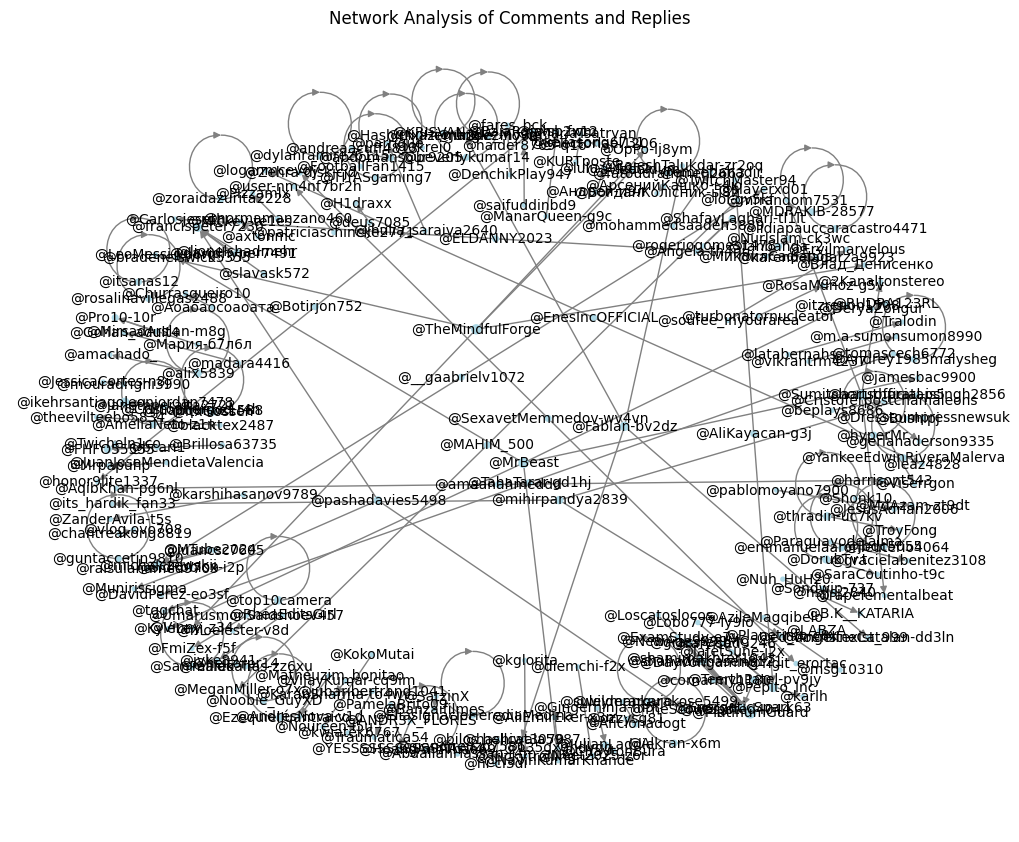

In [3]:
import pandas as pd
import networkx as nx
import ast
import matplotlib.pyplot as plt

# Example DataFrame with your structure


df = pd.read_csv('mrbeast_30_Nov_results.csv')

# Parse the replies column into actual lists of dictionaries
def parse_replies(reply_string):
    try:
        return ast.literal_eval(reply_string)
    except (ValueError, SyntaxError):
        return []  # Return an empty list if parsing fails

df['replies'] = df['replies'].apply(parse_replies)

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for _, row in df.iterrows():
    commenter = row['user_name']  # Main commenter
    replies = row['replies']     # List of replies (parsed as dictionaries)

    for reply in replies:
        replied_to_user = reply.get('username')
        if replied_to_user:  # Only add an edge if a username is present
            G.add_edge(commenter, replied_to_user)

# Analyze the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:", degree_centrality)

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positioning for the graph
nx.draw(
    G, pos, with_labels=True,
    node_size=[v * 2000 for v in degree_centrality.values()],  # Node size based on centrality
    node_color='lightblue',
    edge_color='gray',
    font_size=10
)

# Show graph
plt.title("Network Analysis of Comments and Replies")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined dataframe
try:
    df = pd.read_csv('mrbeast_30_Nov_results.csv')
except FileNotFoundError:
    print("Error: 'combined_data.csv' not found. Please make sure to run the previous code blocks to generate this file.")
    exit()

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Function to get dominant sentiment
def get_dominant_sentiment(sentiment_list):
    if isinstance(sentiment_list, str):
        try:
            sentiment_list = eval(sentiment_list)
        except (SyntaxError, NameError):
            return "Neutral"
    if isinstance(sentiment_list, list) and len(sentiment_list) > 0:
        dominant_sentiment = max(sentiment_list, key=lambda x: x['score'])
        return dominant_sentiment['label']
    return "Neutral"

df['dominant_sentiment'] = df['sentiment'].apply(get_dominant_sentiment)

# Remove rows where the dominant sentiment is 'Neutral'
df = df[df['dominant_sentiment'] != 'Neutral']
df = df[df['dominant_sentiment'] != 'neutral']

# Find the top 5 sentiments
top_5_sentiments = df['dominant_sentiment'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 sentiments
df_top_5 = df[df['dominant_sentiment'].isin(top_5_sentiments)]

# Group by date and sentiment, then count occurrences
sentiment_over_time = df_top_5.groupby(['date', 'dominant_sentiment']).size().unstack(fill_value=0)

# Plotting
sentiment_over_time.plot(kind='line', figsize=(12, 6))
plt.title('Top 5 Sentiments Over Time for Pewdiepie')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

label
neutral       3513
love           599
Neutral        301
admiration     265
surprise       175
Name: count, dtype: int64


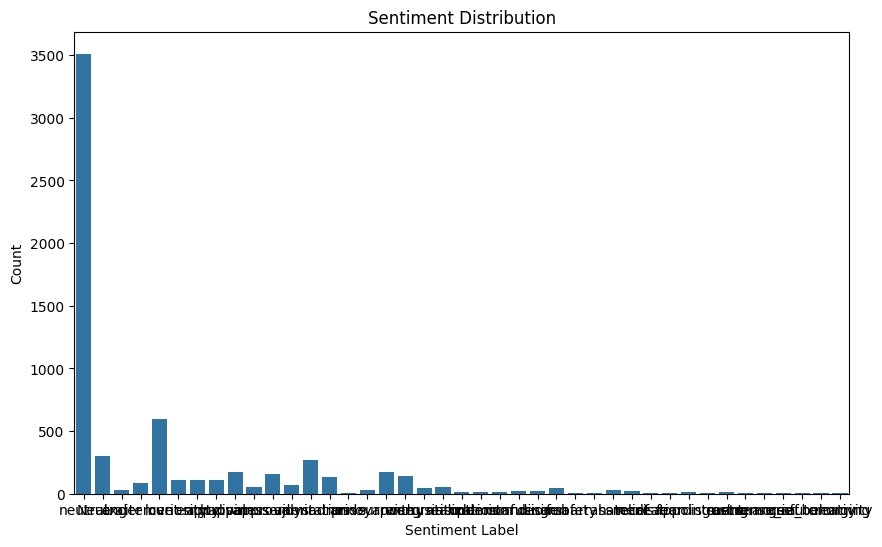

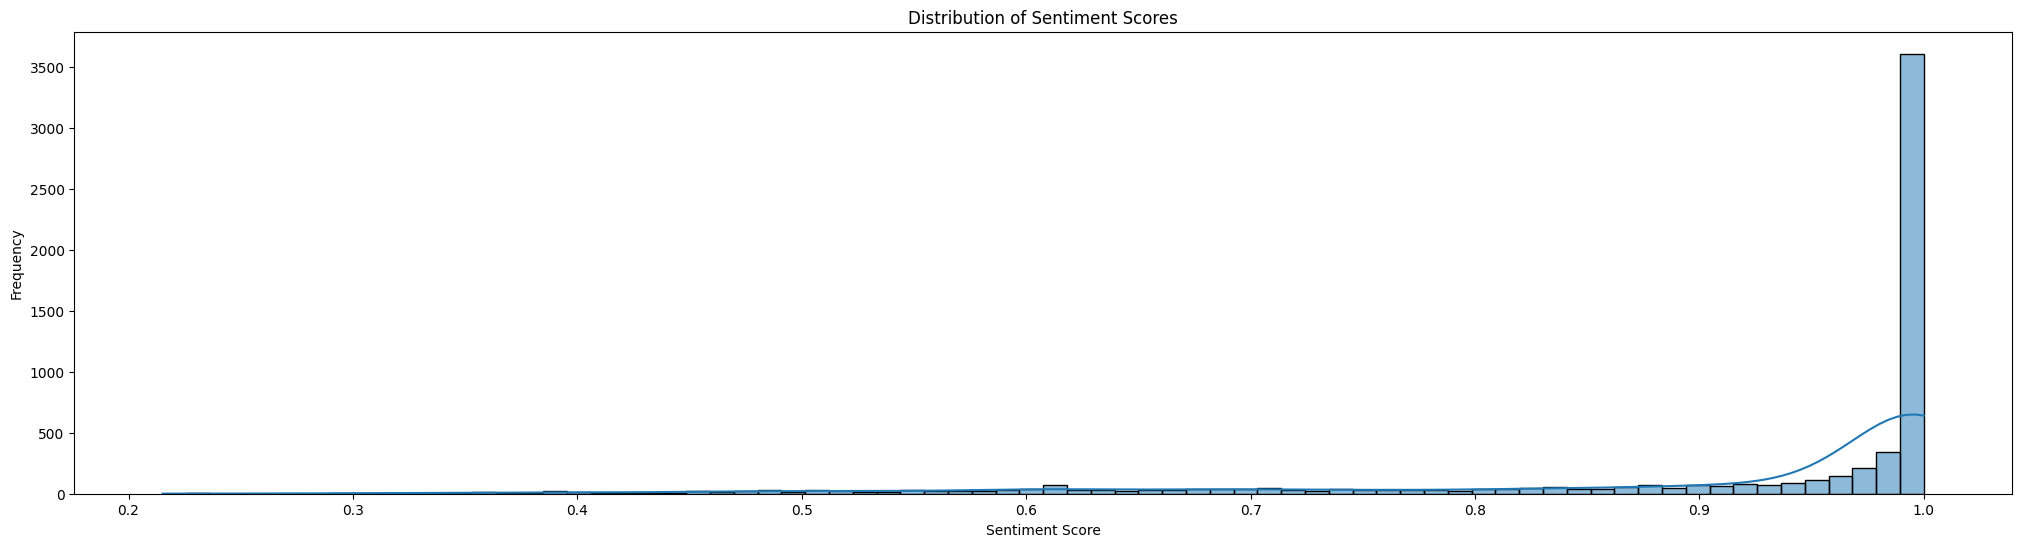

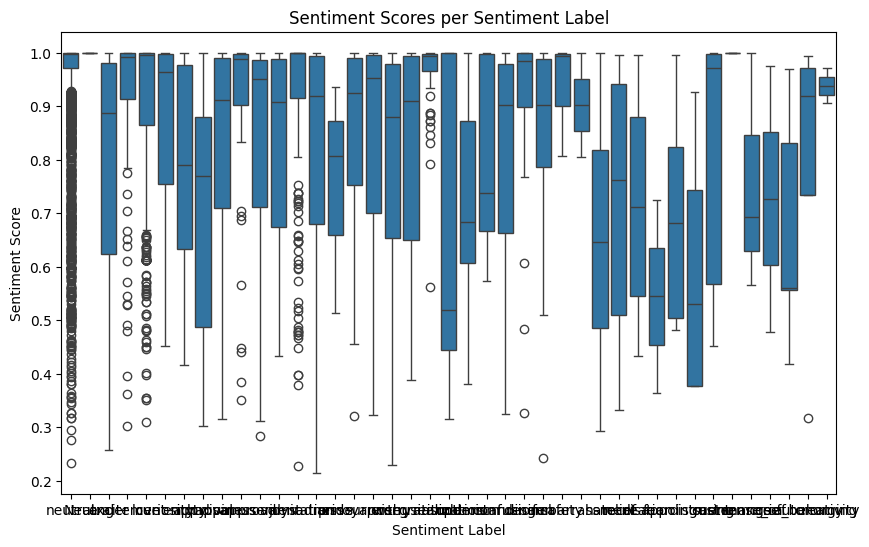

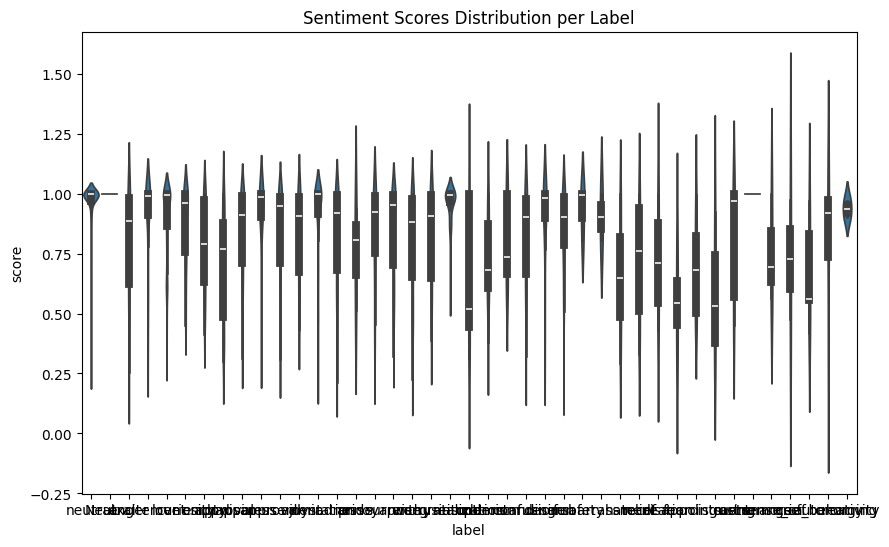

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the dataframe.
try:
    df = pd.read_csv('mrbeast_30_Nov_results.csv')
except FileNotFoundError:
    print("Error: 'sentiment_analysis_results2.csv' not found. Please make sure to run the sentiment analysis code first.")
    exit()

# Convert the sentiment column to lists of dictionaries
df['sentiment'] = df['sentiment'].apply(ast.literal_eval)


# Function to extract labels and scores
def extract_sentiment_info(sentiment_list):
    labels = []
    scores = []
    for item in sentiment_list:
      labels.append(item['label'])
      scores.append(item['score'])
    return labels, scores

df['labels'], df['scores'] = zip(*df['sentiment'].apply(extract_sentiment_info))

# Create a new DataFrame for better visualization
sentiment_df = pd.DataFrame(columns=['label','score'])

for index, row in df.iterrows():
    for i, label in enumerate(row['labels']):
      sentiment_df.loc[len(sentiment_df.index)] = [label, row['scores'][i]]

# Visualizations

# Get top 5 labels and their counts
top_5_labels = sentiment_df['label'].value_counts().nlargest(5)

# Sort the top 5 labels by count in descending order
top_5_labels = top_5_labels.sort_values(ascending=False)

# Print the top 5 labels and their counts
print(top_5_labels)

# 1. Bar plot of sentiment counts
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=sentiment_df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

# 2. Distribution of sentiment scores
plt.figure(figsize=(25, 6))
sns.histplot(x='score', data=sentiment_df, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# 3. Box plot of scores per sentiment label
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='score', data=sentiment_df)
plt.title('Sentiment Scores per Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Sentiment Score')
plt.show()

# 4. Violin plot to show the distribution and density of sentiment scores for each label
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='score', data=sentiment_df)
plt.title('Sentiment Scores Distribution per Label')
plt.show()